In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize

In [7]:
N = np.linspace(9000, 11000)
delta = 0.05
vcd = 50 
vc_bound = np.sqrt((8./N)*np.log((4*(2*N)**vcd)/delta))
penalty_bound = np.sqrt((2*np.log(2*N*N**vcd))/N) + np.sqrt((2./N)*np.log(1/delta)) + 1./N

def parrondo(epsilon, N):
    return epsilon - np.sqrt((1/N)*(2*epsilon + np.log((6*(2*N)**vcd)/delta)))

def vec_parrondo(N):
    output = []
    for i in N:
        output.append(optimize.brentq(parrondo, 0, 10, args = (i)))
    return output

parrondo_bound = vec_parrondo(N)

def devroye(epsilon, N):
    return np.sqrt((1/(2*N))*(4*epsilon*(1+epsilon)+np.log(4/delta) + 2*vcd*np.log(N))) - epsilon

def vec_devroye(N):
    output = []
    for i in N:
        output.append(optimize.brentq(devroye, 0, 10, args = (i)))
    return output

devroye_bound = vec_devroye(N)


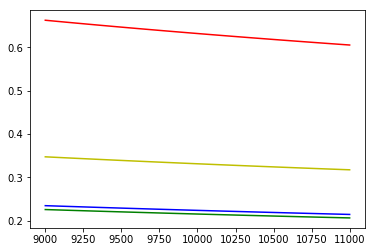

In [8]:
plt.plot(N, vc_bound, 'r-',
         N, penalty_bound, 'y-',
         N, parrondo_bound, 'b-',
         N, devroye_bound, 'g-')
plt.show()

In [23]:
trials = 100000
W = np.zeros((2*trials,1))
X_all = np.zeros((2*trials,1))
for i in range(trials):
    X = np.random.uniform(-1, 1, size=(2,1))
    X_all[2*i:2*i+2,:] = X
    Y = np.sin(np.pi*X[:,0])
    X_cross = np.dot(np.linalg.inv(np.dot(X.T, X)), X.T)
    w = np.dot(X_cross, Y)
    W[2*i] = w
    W[2*i+1] = w
    
print(np.mean(W, axis = 0))
w_bar = np.mean(W, axis = 0)
print(np.mean(np.square(w_bar*X_all - W*X_all)))
print(np.mean(np.square(w_bar*X_all - np.sin(np.pi*X_all))))

[ 1.42706068]
0.202413857246
0.270473510815
